In [1]:

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data/spam.csv')

In [3]:

df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4128,ham,Me i'm not workin. Once i get job...,NaN,NaN,NaN
3303,ham,IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...,NaN,NaN,NaN
4970,ham,Hey come online! Use msn... We are all there,NaN,NaN,NaN
4969,ham,We are supposed to meet to discuss abt our tri...,NaN,NaN,NaN
4161,ham,How's it going? Got any exciting karaoke type ...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
1541,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...
1694,ham,�� eatin later but i'm eatin wif my frens now ...
2766,spam,Married local women looking for discreet actio...
4408,spam,For your chance to WIN a FREE Bluetooth Headse...


In [8]:
# rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
817,ham,Also are you bringing galileo or dobby
4273,ham,Ball is moving a lot.will spin in last :)so ve...
79,ham,Its not the same here. Still looking for a job...
3149,ham,Yo! Howz u? girls never rang after india. L
3202,ham,Haha... Yup hopefully we will lose a few kg b...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:

# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

403

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

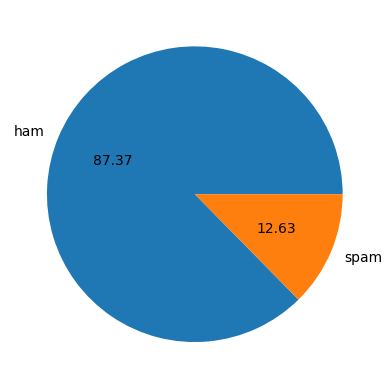

In [19]:
# Ham = 0, Spam = 1
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [32]:
import re

df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', str(x))))


In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [34]:
import re

df['num_sentences'] = df['text'].apply(
    lambda x: len([s for s in re.split(r'[.!?]+', str(x)) if s.strip()])
)


In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,15.928226,2.304508
std,58.175349,11.476827,1.639932
min,2.000000,0.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,23.000000,3.000000
max,910.000000,190.000000,31.000000


In [37]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,14.585031,2.099424
std,56.357463,11.451901,1.510418
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,19.000000,3.000000
max,910.000000,190.000000,31.000000


In [38]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,25.217458,3.722818
std,30.014336,6.079373,1.792465
min,13.000000,2.000000,1.000000
25%,131.000000,23.000000,2.000000
50%,148.000000,27.000000,4.000000
75%,157.000000,29.000000,5.000000
max,223.000000,39.000000,10.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

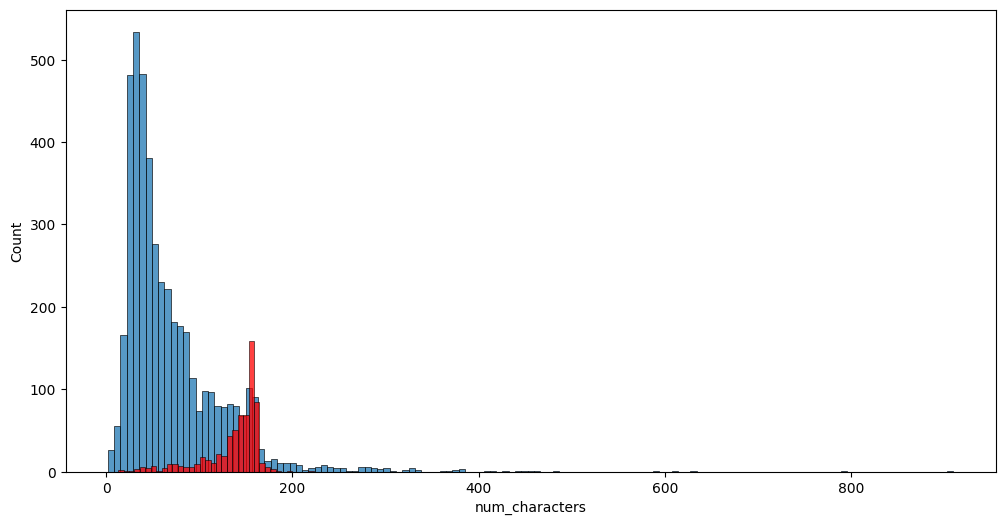

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

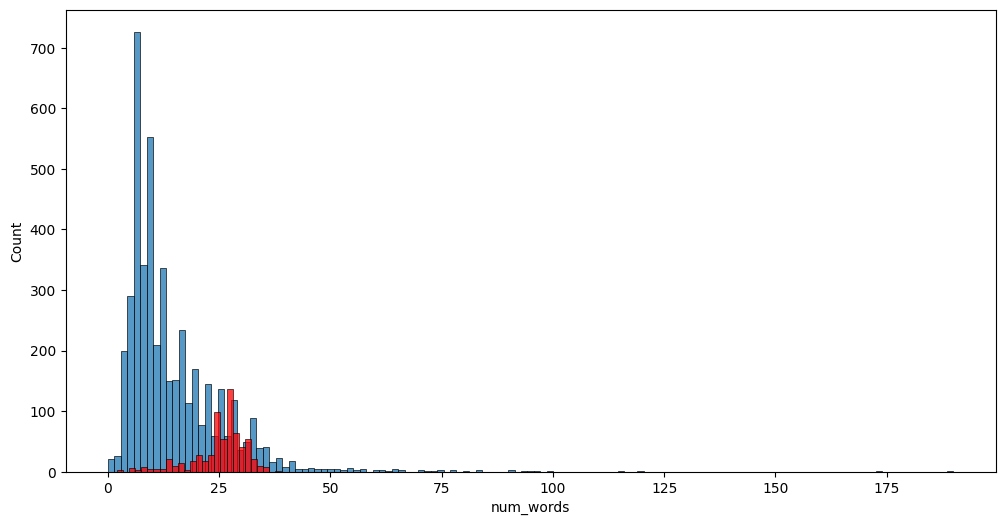

In [41]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

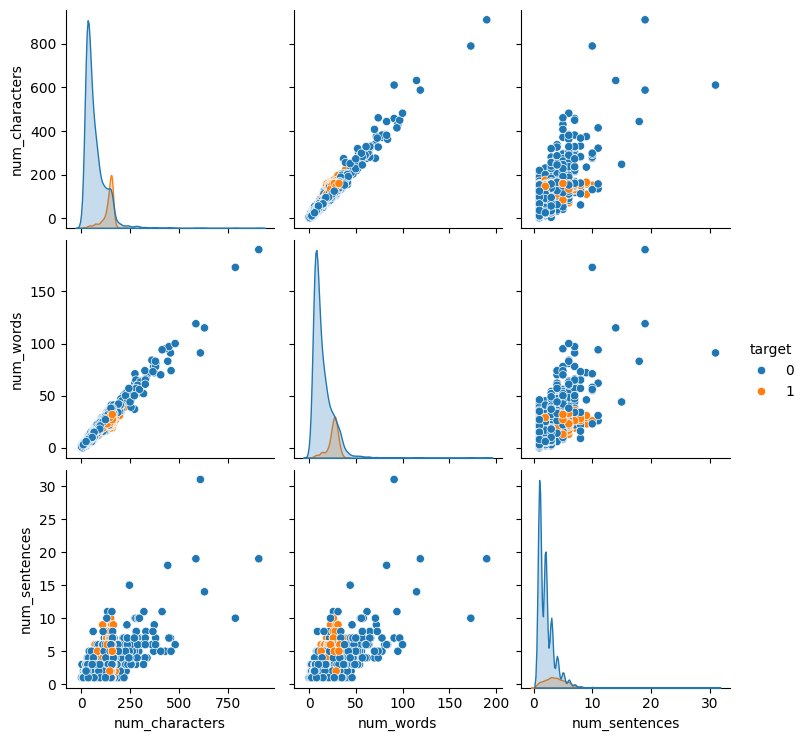

In [42]:
sns.pairplot(df,hue='target')

In [48]:
import re

# Create numeric features from text
df['num_characters'] = df['text'].apply(lambda x: len(str(x)))
df['num_words'] = df['text'].apply(lambda x: len(re.findall(r'\b\w+\b', str(x))))
df['num_sentences'] = df['text'].apply(lambda x: len([s for s in re.split(r'[.!?]+', str(x)) if s.strip()]))


<Axes: >

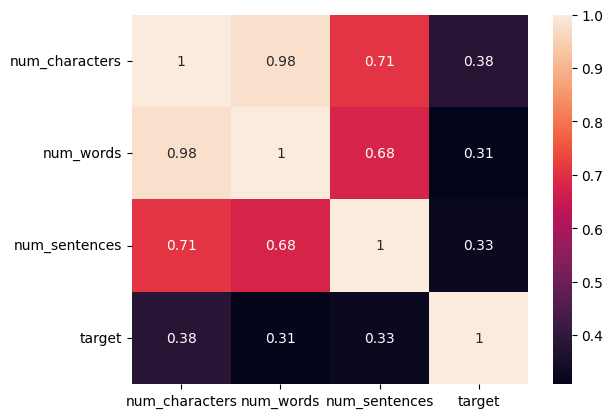

In [49]:
sns.heatmap(df[['num_characters', 'num_words', 'num_sentences', 'target']].corr(), annot=True)


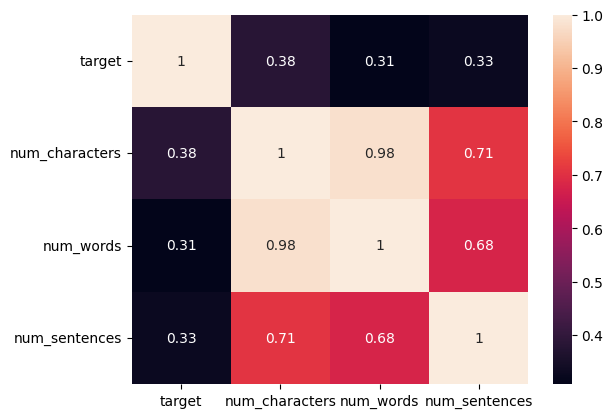

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


# Data Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [53]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wajid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = re.findall(r'\b\w+\b', text)  # replaces nltk.word_tokenize

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


In [57]:
transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gonna home soon want talk stuff anymor tonight k cri enough today'

In [58]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [59]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [60]:
df['transformed_text'] = df['text'].apply(transform_text)

In [61]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


In [63]:
!pip install wordcloud

In [64]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [65]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


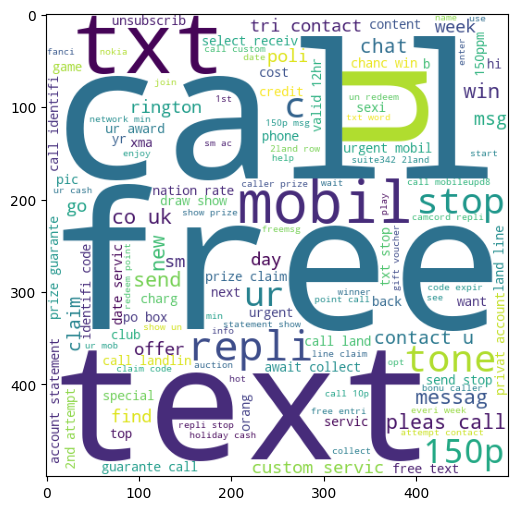

In [66]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [67]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


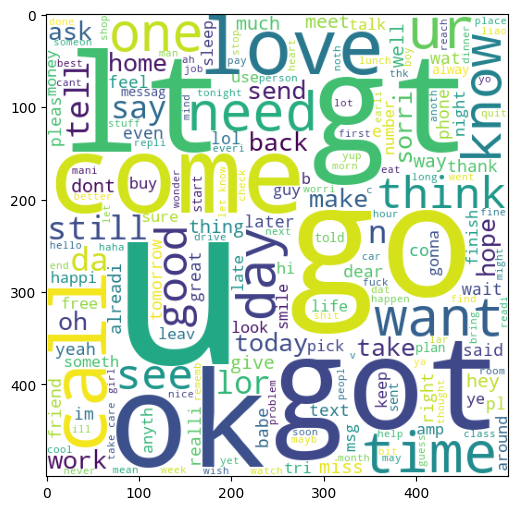

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [69]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


In [70]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [71]:
len(spam_corpus)

11741

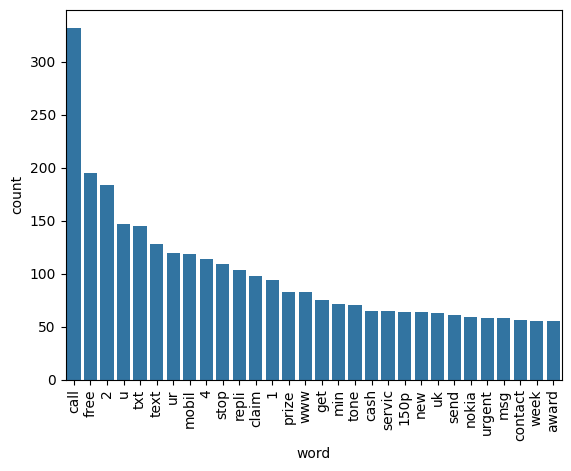

In [73]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from top 30 most common words in spam_corpus
top_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot using keyword arguments
sns.barplot(x='word', y='count', data=top_spam_words)
plt.xticks(rotation='vertical')
plt.show()


In [74]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [75]:
len(ham_corpus)

36227

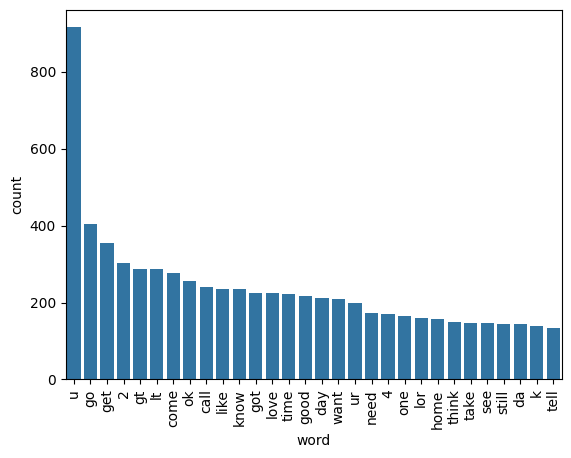

In [77]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the top 30 most common words in ham_corpus
top_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
sns.barplot(x='word', y='count', data=top_ham_words)
plt.xticks(rotation='vertical')
plt.show()


In [78]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,33,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think goe usf live around though


# Model Building

In [79]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [80]:
X = tfidf.fit_transform(df['transformed_text']).toarray()


In [81]:
X.shape


(5169, 3000)

In [82]:
y = df['target'].values


In [83]:
from sklearn.model_selection import train_test_split


In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [85]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [86]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [88]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[781 115]
 [ 19 119]]
0.5085470085470085


In [89]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [90]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[896   0]
 [ 13 125]]
1.0


In [92]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.1 MB/s eta 0:02:14
   ---------------------------------------- 0.8/150.0 MB 1.0 MB/s eta 0:02:23
   ---------------------------------------- 0.8/150.0 MB 1.0 MB/s eta 0:02:23
   ---------------------------------------- 1.0/150.0 MB 1.1 MB/s eta 0:02:20
   ---------------------------------------- 1.3/150.0 MB 1.1 MB/s eta 0:02:16
   ---------------------------------------- 1.6/150.0 MB 1.0 MB/s eta 0:02:24
   ---------------------------------------- 1.6/150.0 MB 1.0 MB/s eta 0:02:24
   ---------------------------------------- 1.8/150.0 MB 923.6 kB/s eta 0:02:41
   ---------------------------------------- 1.8/150.0 MB 923.6 kB/s eta 0:02:41
    --------------------------------------- 2.1/150.0 MB 876.3 kB/s eta 0:02:49
 

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [95]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [96]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [97]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.97678916827853, 0.975)

In [98]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8476190476190476
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9622641509433962
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551


c:\Users\wajid\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9709864603481625
Precision -  0.9576271186440678
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8592592592592593
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9586776859504132
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9489795918367347
For  xgb
Accuracy -  0.9758220502901354
Precision -  0.959349593495935


In [99]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [100]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.975822,1.000000
5,RF,0.974855,0.982759
0,SVC,0.976789,0.975000
4,LR,0.961315,0.962264
10,xgb,0.975822,0.959350
8,ETC,0.973888,0.958678
6,AdaBoost,0.970986,0.957627
9,GBDT,0.951644,0.948980
7,BgC,0.960348,0.859259


In [101]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [102]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.975822
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.976789
4,LR,Accuracy,0.961315
5,xgb,Accuracy,0.975822
6,ETC,Accuracy,0.973888
7,AdaBoost,Accuracy,0.970986
8,GBDT,Accuracy,0.951644
9,BgC,Accuracy,0.960348


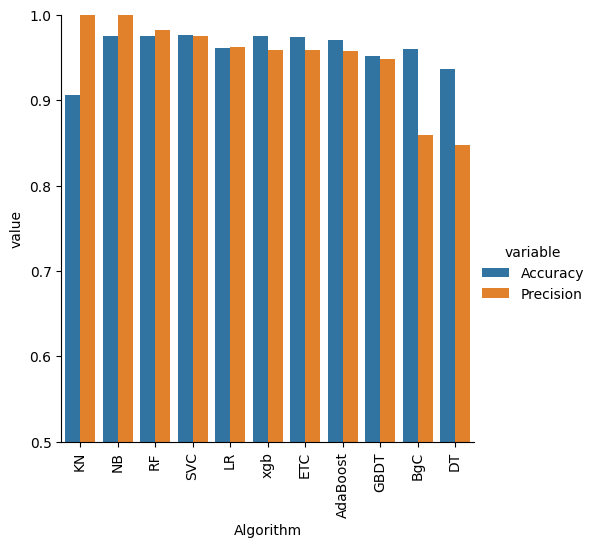

In [103]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [104]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [106]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [107]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [108]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [109]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000
2,RF,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
3,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,LR,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264,0.961315,0.962264
5,xgb,0.975822,0.959350,0.975822,0.959350,0.975822,0.959350,0.975822,0.959350
6,ETC,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678,0.973888,0.958678
7,AdaBoost,0.970986,0.957627,0.970986,0.957627,0.970986,0.957627,0.970986,0.957627
8,GBDT,0.951644,0.948980,0.951644,0.948980,0.951644,0.948980,0.951644,0.948980
9,BgC,0.960348,0.859259,0.960348,0.859259,0.960348,0.859259,0.960348,0.859259


In [110]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [111]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [112]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [113]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9838709677419355


In [114]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [115]:
from sklearn.ensemble import StackingClassifier


In [116]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [117]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9621212121212122


In [120]:
# 1) VECTORIZE & SPLIT
X = df['text'].apply(transform_text)
y = df['target']
vectorizer = TfidfVectorizer()           # or your existing tfidf
X_vect = vectorizer.fit_transform(X)      # <-- fit your vectorizer

# 2) TRAIN
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_vect, y)                        # <-- fit your classifier

# 3) SAVE
import os, pickle
os.makedirs("model", exist_ok=True)
pickle.dump(vectorizer, open("model/vectorizer.pkl", "wb"))
pickle.dump(mnb,          open("model/spam_model.pkl", "wb"))


In [121]:
import pickle
pickle.dump(tfidf,open('../model/vectorizer.pkl','wb'))
pickle.dump(mnb,open('../model/spam_model.pkl','wb'))